**Resources to read about embedding in neural network**
- https://docs.fast.ai/tabular.html 
- https://www.fast.ai/2018/04/29/categorical-embeddings/ 
- https://www.fast.ai/2018/04/29/categorical-embeddings/ 
- https://yashuseth.blog/2018/07/22/pytorch-neural-network-for-tabular-data-with-categorical-embeddings/

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('houseprice.csv', usecols= ["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [4]:
df.shape

(1201, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
MSSubClass     1201 non-null int64
MSZoning       1201 non-null object
LotFrontage    1201 non-null float64
LotArea        1201 non-null int64
Street         1201 non-null object
LotShape       1201 non-null object
YearBuilt      1201 non-null int64
1stFlrSF       1201 non-null int64
2ndFlrSF       1201 non-null int64
SalePrice      1201 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
for i in df.columns:
    print(f"Column name: {i} and the number of uniqure values: {df[i].nunique()}")

Column name: MSSubClass and the number of uniqure values: 15
Column name: MSZoning and the number of uniqure values: 5
Column name: LotFrontage and the number of uniqure values: 110
Column name: LotArea and the number of uniqure values: 869
Column name: Street and the number of uniqure values: 2
Column name: LotShape and the number of uniqure values: 4
Column name: YearBuilt and the number of uniqure values: 112
Column name: 1stFlrSF and the number of uniqure values: 678
Column name: 2ndFlrSF and the number of uniqure values: 368
Column name: SalePrice and the number of uniqure values: 597


In [7]:
import datetime
datetime.datetime.now().year

2024

In [8]:
df['Total Years'] = datetime.datetime.now().year - df['YearBuilt']

In [9]:
df.drop("YearBuilt",axis=1, inplace=True)

In [10]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [11]:
cat_features = ['MSSubClass', 'MSZoning','Street','LotShape']
out_feature = 'SalePrice'

In [12]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}
lbl_encoders['MSSubClass'] = LabelEncoder()
lbl_encoders['MSSubClass'].fit_transform(df['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [13]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}
for feature in cat_features:
    lbl_encoders[feature] = LabelEncoder()
    df[feature] = lbl_encoders[feature].fit_transform(df[feature])

In [14]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
5,4,3,85.0,14115,1,0,796,566,143000,31
6,0,3,75.0,10084,1,3,1694,0,307000,20
8,4,4,51.0,6120,1,3,1022,752,129900,93
9,14,3,50.0,7420,1,3,1077,0,118000,85
10,0,3,70.0,11200,1,3,1040,0,129500,59


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
MSSubClass     1201 non-null int64
MSZoning       1201 non-null int32
LotFrontage    1201 non-null float64
LotArea        1201 non-null int64
Street         1201 non-null int32
LotShape       1201 non-null int32
1stFlrSF       1201 non-null int64
2ndFlrSF       1201 non-null int64
SalePrice      1201 non-null int64
Total Years    1201 non-null int64
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


- For word embedding label encoding is really important


In [16]:
# Stacking and Converting into tensors
import numpy as np

cat_features = np.stack([df['MSSubClass'], df['MSZoning'], df['Street'], df['LotShape']],1)
cat_features                    

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [17]:
# Convert numpy to tensor
import torch

cat_features = torch.tensor(cat_features, dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [18]:
#  Create continuous variable

cont_features = []
for i in df.columns:
    if i in ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'SalePrice']:
        pass
    else:
        cont_features.append(i)

In [19]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [20]:
# Stacking continuous variable to a tensor

cont_values = np.stack([df[i].values for i in cont_features], axis=1)
cont_values = torch.tensor(cont_values, dtype=torch.float)
cont_values 

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [21]:
cont_values.dtype

torch.float32

In [22]:
# Dependent Feature

y = torch.tensor(df['SalePrice'].values, dtype=torch.float).reshape(-1, 1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
MSSubClass     1201 non-null int64
MSZoning       1201 non-null int32
LotFrontage    1201 non-null float64
LotArea        1201 non-null int64
Street         1201 non-null int32
LotShape       1201 non-null int32
1stFlrSF       1201 non-null int64
2ndFlrSF       1201 non-null int64
SalePrice      1201 non-null int64
Total Years    1201 non-null int64
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


In [24]:
cat_features.shape, cont_values.shape, y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [25]:
len(df['MSSubClass'].unique())

15

In [26]:
# Embedding Size for categorical columns

cat_dims = [len(df[col].unique()) for col in ['MSSubClass', 'MSZoning','Street', 'LotShape']]

In [27]:
cat_dims

[15, 5, 2, 4]

### Embedding is done categorical columns only

**Thumb Rule**: The output dimension of the embedding should be set based on the dimension as -->>  min(50, feature_dimension/2)

In [28]:
embedding_dim = [(length, min(50, (length+1) // 2)) for length in cat_dims]
embedding_dim # (input_dimension, output_dimension) for embedding

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp, out in embedding_dim])

embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [30]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [31]:
cat_featurez = cat_features[:4]
cat_featurez

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [32]:
pd.set_option('display.max_rows',500)
embedding_val = []

for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_featurez[:,i]))

In [33]:
embedding_val

[tensor([[-0.2716,  1.0844,  0.2781, -0.3733,  0.8428, -0.8859,  0.3950, -1.2057],
         [ 2.0258, -0.2482,  0.5679,  0.1393,  1.5030, -0.5234, -0.5368,  0.7156],
         [-0.2716,  1.0844,  0.2781, -0.3733,  0.8428, -0.8859,  0.3950, -1.2057],
         [ 0.4973, -0.4078, -0.3184, -1.0175,  0.2775,  0.7671,  1.6457, -0.7991]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.4845, -0.9393, -0.3214],
         [ 1.4845, -0.9393, -0.3214],
         [ 1.4845, -0.9393, -0.3214],
         [ 1.4845, -0.9393, -0.3214]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.7988],
         [-0.7988],
         [-0.7988],
         [-0.7988]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.1901, -0.4346],
         [-1.1901, -0.4346],
         [-0.0537,  0.3070],
         [-0.0537,  0.3070]], grad_fn=<EmbeddingBackward0>)]

In [34]:
z = torch.cat(embedding_val, 1)
z

tensor([[-0.2716,  1.0844,  0.2781, -0.3733,  0.8428, -0.8859,  0.3950, -1.2057,
          1.4845, -0.9393, -0.3214, -0.7988, -1.1901, -0.4346],
        [ 2.0258, -0.2482,  0.5679,  0.1393,  1.5030, -0.5234, -0.5368,  0.7156,
          1.4845, -0.9393, -0.3214, -0.7988, -1.1901, -0.4346],
        [-0.2716,  1.0844,  0.2781, -0.3733,  0.8428, -0.8859,  0.3950, -1.2057,
          1.4845, -0.9393, -0.3214, -0.7988, -0.0537,  0.3070],
        [ 0.4973, -0.4078, -0.3184, -1.0175,  0.2775,  0.7671,  1.6457, -0.7991,
          1.4845, -0.9393, -0.3214, -0.7988, -0.0537,  0.3070]],
       grad_fn=<CatBackward0>)

In [35]:
# Implement dropout
dropout = nn.Dropout(.4)

In [36]:
final_embed = dropout(z)
final_embed

tensor([[-0.0000,  0.0000,  0.4636, -0.0000,  1.4046, -1.4765,  0.6583, -2.0095,
          0.0000, -0.0000, -0.0000, -1.3313, -1.9835, -0.7243],
        [ 0.0000, -0.4137,  0.0000,  0.0000,  2.5050, -0.8723, -0.8947,  1.1926,
          2.4741, -1.5655, -0.5357, -0.0000, -1.9835, -0.0000],
        [-0.4526,  1.8074,  0.4636, -0.6221,  1.4046, -0.0000,  0.0000, -0.0000,
          2.4741, -1.5655, -0.5357, -1.3313, -0.0895,  0.0000],
        [ 0.8288, -0.6797, -0.5306, -1.6958,  0.4624,  0.0000,  0.0000, -1.3318,
          0.0000, -0.0000, -0.0000, -1.3313, -0.0895,  0.5116]],
       grad_fn=<MulBackward0>)

**This embedding steps are to be followed while creating the neural network**

### Creating a Feed Forward Neural Network 

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()

        # Creating the embeddings 
        self.embeds = nn.ModuleList([nn.Embedding(inp, out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)

        # Batch Normalization
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((out for inp, out in embedding_dim))
        n_in = n_emb + n_cont

        # Creating the layers in the neural network
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append(nn.Linear(layers[-1], out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [38]:
len(cont_features)

5

In [39]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim, len(cont_features), 1, [100,50], p=0.4)

In [40]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

##### Define Loss and Optimizer

In [41]:
model.parameters 

<bound method Module.parameters of FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)>

In [73]:
loss_function = nn.MSELoss() ### Later convert to RMSE
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [74]:
df.shape

(1201, 10)

In [75]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [76]:
cont_values.shape

torch.Size([1201, 5])

In [77]:
#  Train Test Split the dataset
batch_size = 1200
test_size =int(batch_size *0.15)

train_categorical = cat_features[:batch_size-test_size]
test_categorical = cat_features[batch_size-test_size:batch_size]

train_cont = cont_values[:batch_size-test_size]
test_cont = cont_values[batch_size-test_size:batch_size]

y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [78]:
len(train_categorical), len(test_categorical), len(train_cont), len(test_cont), len(y_train), len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [79]:
epochs = 10000
final_losses = []

for i in range(epochs):
    i = i + 1
    y_pred = model(train_categorical, train_cont)
    loss = torch.sqrt(loss_function(y_pred,y_train)) ## RMSE loss

    final_losses.append(loss)
    if i%10 == 1:
        print(f"Epoch number: {i} and the loss: {loss.item()}")
    
    optimizer.zero_grad()
    loss.backward() ### backpropagation
    optimizer.step()


Epoch number: 1 and the loss: 33757.2421875
Epoch number: 11 and the loss: 33145.12890625
Epoch number: 21 and the loss: 33653.1015625
Epoch number: 31 and the loss: 34360.80859375
Epoch number: 41 and the loss: 32906.37890625
Epoch number: 51 and the loss: 32319.251953125
Epoch number: 61 and the loss: 32435.208984375
Epoch number: 71 and the loss: 34002.92578125
Epoch number: 81 and the loss: 33037.52734375
Epoch number: 91 and the loss: 33406.9296875
Epoch number: 101 and the loss: 34522.78125
Epoch number: 111 and the loss: 32339.8984375
Epoch number: 121 and the loss: 32748.171875
Epoch number: 131 and the loss: 32473.263671875
Epoch number: 141 and the loss: 31907.666015625
Epoch number: 151 and the loss: 32096.837890625
Epoch number: 161 and the loss: 32950.23046875
Epoch number: 171 and the loss: 33065.703125
Epoch number: 181 and the loss: 33423.96484375
Epoch number: 191 and the loss: 32882.5625
Epoch number: 201 and the loss: 33191.78125
Epoch number: 211 and the loss: 34202

Text(0, 0.5, 'RMSE Loss')

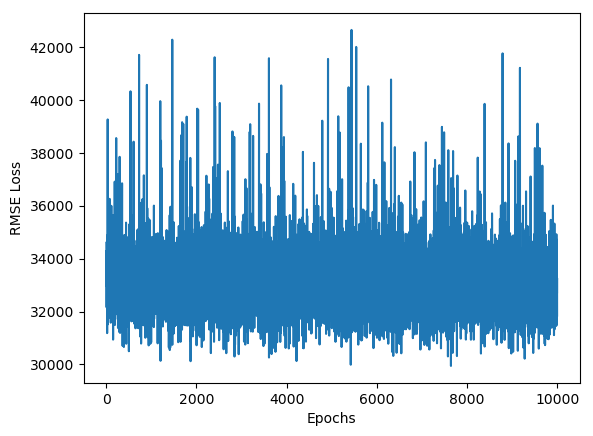

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs), final_losses)
plt.xlabel("Epochs")
plt.ylabel("RMSE Loss")


In [81]:
# Validate teh test data
y_pred = ""
with torch.no_grad():
    y_pred = model(test_categorical, test_cont)
    loss = torch.sqrt(loss_function(y_pred,y_test))

print(f"RMSE loss: {loss.item()}")

RMSE loss: 46981.00390625


In [82]:
data_verify = pd.DataFrame(y_test.tolist(), columns=['Test'])

In [83]:
data_predicted = pd.DataFrame(y_pred.tolist(), columns=['Prediction'])

In [84]:
data_predicted

,Prediction
0,214890.015625
1,162038.109375
2,134831.234375
3,259885.187500
4,168094.984375
5,233115.078125
6,233963.953125
7,266050.906250
8,154268.859375
9,440669.687500


In [85]:
final_output = pd.concat([data_verify,data_predicted], axis=1)
final_output['Difference'] = final_output['Test']-final_output['Prediction']

final_output.head()

,Test,Prediction,Difference
0,130000.0,214890.015625,-84890.015625
1,138887.0,162038.109375,-23151.109375
2,175500.0,134831.234375,40668.765625
3,195000.0,259885.187500,-64885.187500
4,142500.0,168094.984375,-25594.984375


In [86]:
# Saving the Model
torch.save(model, 'HousePrice.pt')

In [87]:
# Saving the weights for the model
torch.save(model.state_dict(), 'HouseWeight.pt')


In [88]:
# Load the model 

# The embedding matrix is required for the model
embs_size = [(15,8),(5,3),(2,1),(4,2)]

model1 = FeedForwardNN(embs_size, 5, 1, [100,50], p=0.4)

In [89]:
model1.load_state_dict(torch.load('HouseWeight.pt'))

<All keys matched successfully>

In [90]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)